# Workspace \#9: Projections

In [9]:
%matplotlib notebook

In [10]:
# %load firstcell.py
# autoreloading for imported modules
%load_ext autoreload
%autoreload 2

# getting future division
from __future__ import division

# numpy
import numpy as np
from numpy import pi, sqrt, log, log10, power, exp

#scipy
from scipy.interpolate import interp1d

# matplotlib
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib import rc
# from matplotlib.lines import Line2D

# other
import os
from tqdm import tqdm
from glob import glob

# matplotlib style
#%matplotlib inline

#%config InlineBackend.figure_format = "retina"
#rcParams['figure.figsize'] = (13, 8)
rcParams['font.family'] = 'serif'
rcParams['font.serif'] = ['New Times Roman']
rc('text', usetex=True)

# current directory
current_dir = os.getcwd()

from multiprocessing import Pool

In [11]:
from random import random

import sys
sys.path.insert(0, '../')

import constants as ct
import particle as pt
import astro as ap
import echo as ec
import routines as rt
import data as dt

# Optical depth cross check

Model (a) of Gregory and Seaquist 1974

<IPython.core.display.Javascript object>


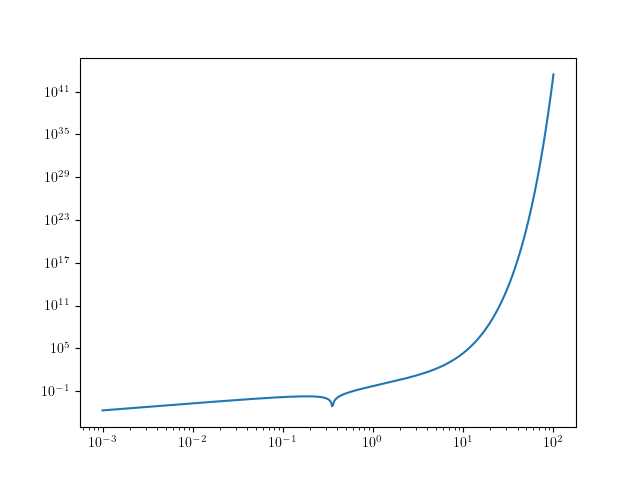

In [12]:
tau_m_arr = np.logspace(-3, 2, 500)
gamma = 2

plt.subplots()
plt.plot(tau_m_arr, np.abs(np.exp(tau_m_arr) - ((gamma+4.)/5 * tau_m_arr + 1.)))
plt.yscale('log')
plt.xscale('log')

In [13]:
from scipy.optimize import root_scalar

In [14]:
def find_tau_m(gamma):
    def func(tau):
        return (np.exp(tau) - ((gamma+4.)/5 * tau + 1.))
    res = root_scalar(func, bracket=[1e-10, 10], method='brentq')
    return res.root

find_tau_m(3.)

0.6390296264710424

<IPython.core.display.Javascript object>


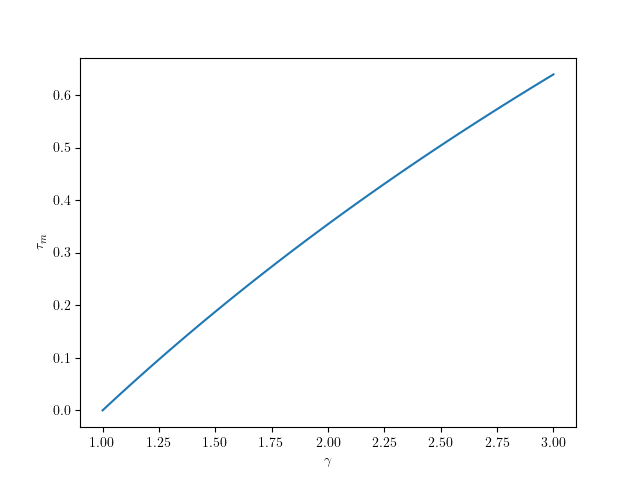

Text(0, 0.5, '$\\tau_m$')

In [15]:
plt.subplots()
gamma_arr = np.linspace(1, 3)
tau_arr = np.array([find_tau_m(gamma) for gamma in gamma_arr])
plt.plot(gamma_arr, tau_arr)
plt.xlabel(r'$\gamma$')
plt.ylabel(r'$\tau_m$')

In [16]:
twopi_GHz_over_eV = 4.13357119850271e-06

In [17]:
def tau(nu, EM, Te):
    """ 
    nu: [GHz]
    EM: emission measure [cm^-6*pc]
    Te: temperature of electrons [K]
    """
    res = 6.35e17 * (EM) * Te**(-1.38) * (nu/(1e-9))**(-2.08)
    return res

tau(1, 1, 5000)

9.510319762021515e-07

In [18]:
tau(1, 0.015**2*1000, 5000)

2.139821946454841e-07

<IPython.core.display.Javascript object>


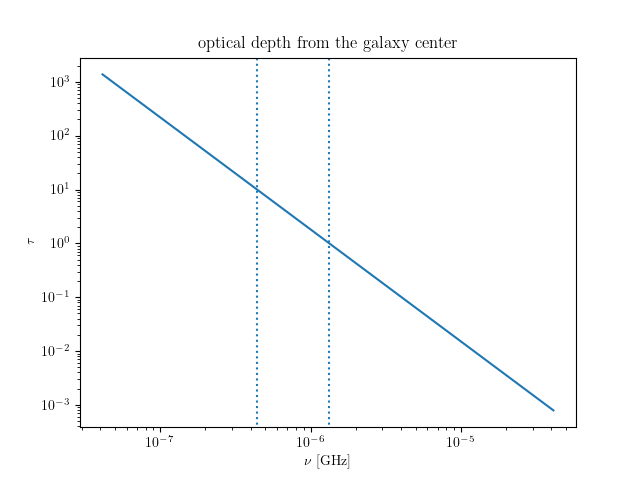

0.3226618752492872
0.10665431303534932


In [19]:
plt.subplots()
plt.yscale('log')
plt.xscale('log')
plt.xlabel(r'$\nu$ [GHz]')
plt.ylabel(r'$\tau$')
plt.title('optical depth from the galaxy center')

nu_arr = np.logspace(-2, 1)
E_arr = nu_arr * twopi_GHz_over_eV
plt.plot(E_arr, tau(nu_arr, EM=1e5, Te=5000))
y0, y1 = plt.ylim()
plt.ylim(y0, y1)

# solve
def func(nu):
    return tau(nu, EM=1e5, Te=5000)-1.
res = root_scalar(func, bracket=[1e-10, 10], method='brentq')
nu0 = res.root
print(nu0)
plt.vlines(nu0*twopi_GHz_over_eV, 1e-5, 1e5, ls=':')

# solve 2
def func(nu):
    return tau(nu, EM=1e4, Te=5000)-1.
res = root_scalar(func, bracket=[1e-10, 10], method='brentq')
nu0 = res.root
print(nu0)
plt.vlines(nu0*twopi_GHz_over_eV, 1e-5, 1e5, ls=':')

#plt.savefig('/home/chen/Dropbox/Research/axion_stim_decays/SNR_Ghost_draft/figs/optical_depth.pdf')

# Other axion constraints

In [20]:
sys.path.insert(0, '../../../AxionLimits/')
from PlotFuncs_mod import AxionPhoton
plt.rcParams['axes.linewidth'] = 2.5
plt.rc('font', family='serif',size=25)
#plt.rc('text', usetex=True)
#mpl.rcParams['text.latex.preamble'] = [r'\usepackage{mathpazo}']

In [21]:
def gen_constraints(show_bounds=True):
    fig, ax = plt.subplots(figsize=(10,7))
    plt.yscale('log')
    plt.xscale('log')
    plt.ylim(1.5e-12, 1e-9)
    plt.xlim(1e-7, 1e-3)
    plt.xlabel(r'$m_a$ [eV]')
    plt.ylabel(r'$g_{a\gamma}$ [GeV$^{-1}$]')

    fs = 20 # fontsize
    text_on = True
    projection = False

    if show_bounds:
    # AxionPhoton.Haloscopes(ax)
    # hand-pick those from Haloscopes 
    # the references are here: 
    # https://github.com/cajohare/AxionLimits/tree/master/refs
        AxionPhoton.ADMX(ax,projection=projection,fs=fs,text_on=text_on, col=[0.8, 0.8, 0.8], text_shift=[1.7, 0.6e2])
        AxionPhoton.RBF_UF(ax,fs=fs-2,text_on=text_on, col=[0.8, 0.8, 0.8], text_shift=[1.1, 1.5])
        AxionPhoton.HAYSTAC(ax,projection=projection,text_on=text_on, col=[0.8, 0.8, 0.8], fs=13, text_shift=[0.8, 15])
        AxionPhoton.CAPP(ax,fs=fs-4,text_on=text_on, col=[0.4, 0.4, 0.4], text_shift=[1.1,400])
        AxionPhoton.ORGAN(ax,projection=projection,text_on=text_on, col=[0.8, 0.8, 0.8], fs=15, text_shift=[1,0.6])
        AxionPhoton.ADMX_SLIC(ax,fs=fs-8,text_on=text_on, col=[0.8, 0.8, 0.8], text_shift=[0.6,1])
        AxionPhoton.QUAX(ax,text_on=text_on, text_shift=[0.8, 0.5], col=[0.8, 0.8, 0.8])
        AxionPhoton.Helioscopes(ax, text_shift=[3e-2, 0.9], col=[0.6, 0.6, 0.6])
        AxionPhoton.NeutronStars(ax, fs=fs, text_shift=[6,0.15], col=[0.6, 0.6, 0.6])
    #plt.tight_layout()
    return fig, ax

<IPython.core.display.Javascript object>


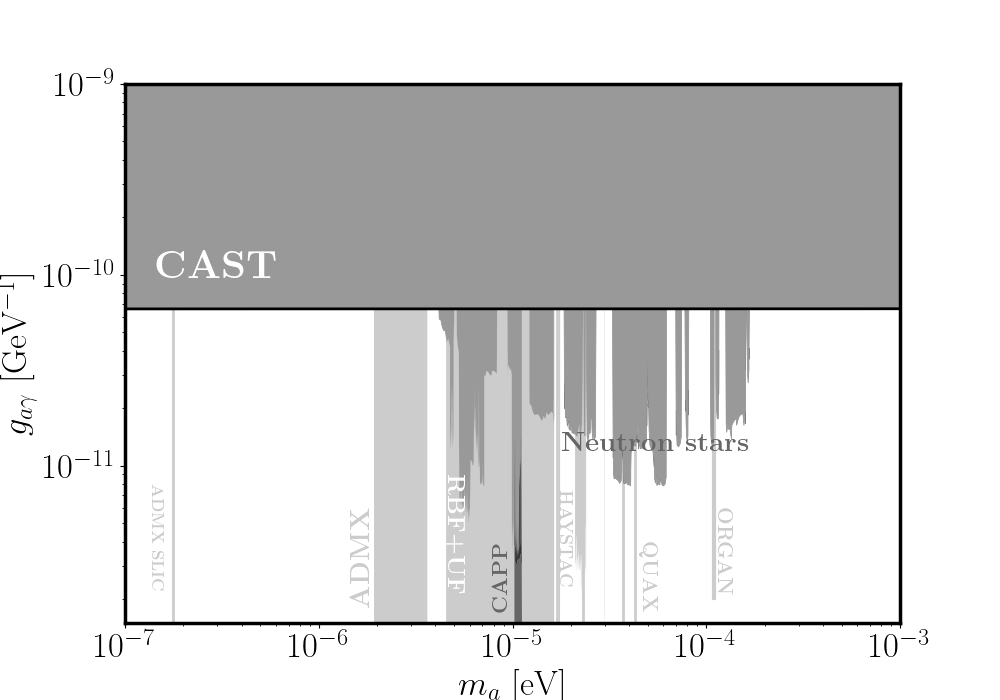

In [22]:
fig, _ = gen_constraints()

# Single benchmarks in ($m_a, g_{a\gamma}$)

TODO: 

1. double check the formula to be used for the signal --DONE
1. check if denser DM increases or descreases the signal --DONE
1. check the $(\ell, b)$ dependence
1. make new $m_a-g_a$ contours
    1. just shift local density by some constant, say $4\times 10^4$ years
    1. increase $S_{\nu,0}$
    1. increase number of SNR's
1. refine the abberation and moving-out-of-spotlight effect    


In [65]:
ct._casA_solid_angle_ 

1.6614302187698022e-06

In [285]:
DM_profile = "NFW" #"Burkert" # "NFW"
longitude = 179 #175 #178 #10 #179 # 111.734745
latitude = 0. # -02.129570
L_peak = 10**(25.5+1.6*2.)
t_peak = 10**1.7
t_trans = t_peak * 30./365
D = 0.5 #[kpc]
alpha = 0.5
gamma = ap.gamma_from_alpha(alpha)
ang_size = 1e-5 #1e-6 #1e-5 #1e-4 #


source_input = {'longitude':longitude,
                'latitude':latitude, 
                'distance':D, 
                'size':ang_size,
                't_age':1e4, 
                'alpha':alpha,
                'nu_pivot':1.,
                'gamma':gamma, # Cas A experiment
#                 'gamma':(2.032 * 1.3/0.7), # a detected 1.3% decay rather than 0.7%
#                 'model':'eff', 'L_today':LumCasA, 'L_peak':1.e30,
                #'model':'eff', 'L_today':LumCasA, 't_trans':10.,
                'model': "eff", 'L_peak': L_peak, 't_peak': t_peak, 't_trans': t_trans,
                'force_Omega_disp_compute': True
               }

ma_ref, ga_ref = pt.ma_from_nu(source_input['nu_pivot']), 1.e-10
axion_input = rt.ax_in(ma_ref, ga_ref)

data = {'deltaE_over_E':1.e-3*2.17,
        'f_Delta':0.721,
        'exper':'SKA',
        'total_observing_time':100.,
        'average':True,
        'verbose':0,
        'DM_profile': DM_profile
       }

t_peak = source_input['t_peak']
t_age = source_input['t_age']

Snu_echo_kwargs = {'tmin_default':None,
                   'Nt':10001,
                   'xmin':ct._au_over_kpc_,
                   'xmax_default':100.,
                   'use_quad':False,
                   'lin_space':False,
                   'Nint':int(30*(t_age)+1),
                   't_extra_old':None}

### t_extra_old slices

In [290]:
Nma = 501
nulow = np.logspace(log10(ct._nu_min_ska_low_), log10(ct._nu_max_ska_low_), Nma//2)
numid = np.logspace(log10(ct._nu_min_ska_mid_), log10(ct._nu_max_ska_mid_), Nma - Nma//2)

ma_new = pt.ma_from_nu(np.concatenate((nulow, numid)))
ga_new = ga_ref

res_dct = {}
#t_extra_old_arr = [1.e2, 1.e3, 1.e4, 2e4, 3e4, 4e4, 5e4]
#t_extra_old_arr = [0, 1.e4, 2e4, 3e4, 4e4, 5e4]
#t_extra_old_arr = [0, 1.e4, 3e4, 5e4]
#t_extra_old_arr = [0, 5e4]
#t_extra_old_arr = [3e4, 4e4, 5e4]
t_extra_old_arr = [0, 4e4]
for t_extra_old in t_extra_old_arr:
    Snu_echo_kwargs['t_extra_old'] = t_extra_old
    #print(Snu_echo_kwargs)
    routine_out = {}
    bounds_out = rt.full_routine(ma_new, ga_new, ga_ref, routine_out,
                                 source_input=source_input,
                                 data=data,
                                 Snu_echo_kwargs=Snu_echo_kwargs)
    res_dct[str(int(t_extra_old))] = bounds_out

#area, window, Tr = rt.SKA_rescaled_specs(ma_new, ma_ref, data=data)

/home/chen/Code/axion_laser/github/workspace_notebooks/../astro.py:902: RuntimeWarning: divide by zero encountered in true_divide
  sqrt(Omega_obs/Omega_res)


<IPython.core.display.Javascript object>


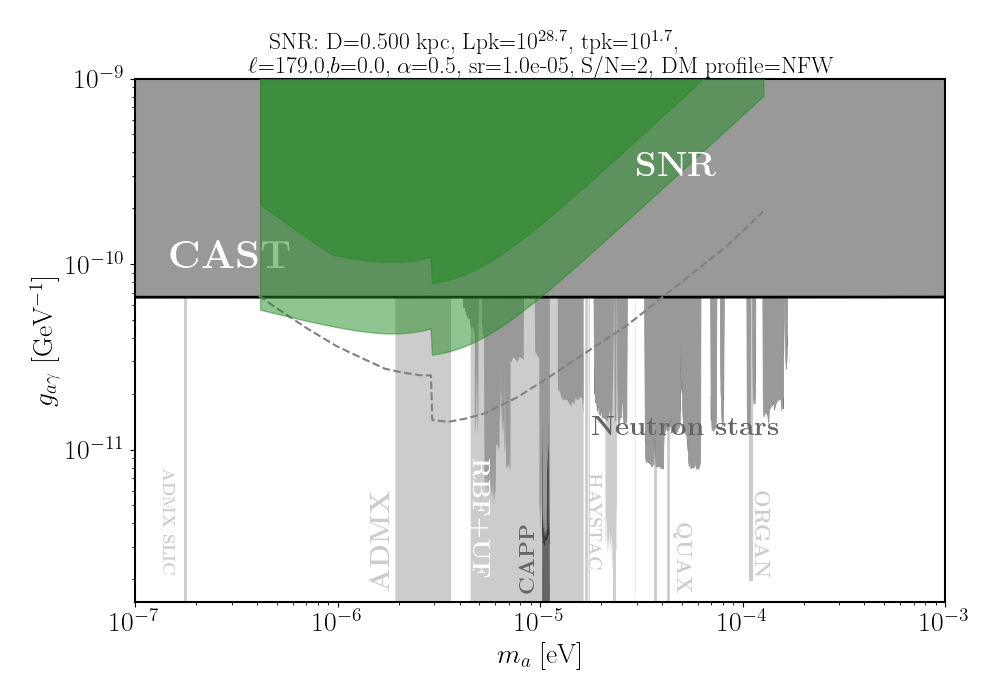

/home/chen/Code/axion_laser/github/workspace_notebooks/../echo.py:1172: RuntimeWarning: divide by zero encountered in true_divide


In [291]:
fig, ax = gen_constraints();

ghosh = np.loadtxt("../data/cygA_bounds.csv", delimiter=",")
z_val = 2.
# plt.subplots()
# plt.xlabel('$m_a$ [eV]')
# plt.ylabel('$g_{a\gamma\gamma}$ [GeV$^{-1}$]')
# plt.axhline(6.e-11, color='k', ls=':')

# existing echo bounds
ax.plot(ghosh[:,0], ghosh[:,1]*sqrt(z_val), color=[0.5,0.5,0.5], ls='--')


for key in t_extra_old_arr: #res_dct.keys():
    key = str(int(key))
    bounds_out = res_dct[key]
    ga_reach = ec.ga_reach(z_val, bounds_out['S/N'], bounds_out['ga'])
    ma_ga = np.vstack((ma_new, ga_reach)).T
    #ax.loglog(ma_ga[:,0], ma_ga[:,1], label='%s' %key)
    ax.fill_between(ma_ga[:,0], ma_ga[:,1], 1., label='%s' %key, color='forestgreen', alpha=0.5, zorder=100)

ax.text(3e-5, 3e-10, r"{\bf SNR}", fontdict={'size':25}, color='w', zorder=101)
# ax.set_xscale("log");ax.set_yscale("log");
#ax.set_ylim(1.e-13, 1.e-8);
#ax.legend(loc='upper left', bbox_to_anchor=(1.05, 1.), ncol=len(t_extra_old_arr), prop={'size': 10})
#ax.legend(loc='upper left', bbox_to_anchor=(1.05, 1.), ncol=1, prop={'size': 10})


title_str = r"SNR: D={D:.3f} kpc, Lpk=10$^{{{log10Lpk:.1f}}}$, tpk=10$^{{{log10tpk:.1f}}}$,\\$\ell$={ell:.1f},$b$={b:.1f}, $\alpha$={alpha:.1f}, sr={sr:.1e}, S/N={sn:.0f}, DM profile={DM_profile}"
title = title_str.format(D=D,
                 log10Lpk=np.log10(L_peak), 
                 log10tpk=np.log10(t_peak),
                 ell=longitude,
                 b=latitude,
                 alpha=alpha,
                 sr=ang_size, 
                 sn=z_val,
                 DM_profile=DM_profile)

ax.set_title(title, fontdict={'fontsize': 17})
fig.tight_layout()
plt.savefig('../plots/projection_old_logLpk_%.1f_logtpk_%.1f_ell_%.1f_b_%.1f_snr_%d_sr_%.1e_D_%.1f_alpha_%.1f_%s.png' %(np.log10(L_peak), np.log10(t_peak), longitude, latitude, z_val, ang_size, D, alpha, DM_profile))



In [298]:
10**(-10.2)

6.309573444801942e-11

In [292]:
source_input['Omega_dispersion']

0.00020943795150667928

In [216]:
ct.angle_to_solid_angle(5e4/2/ct._kpc_over_lightyear_ *1e-3/0.5)

0.00018457365090641256

In [217]:
del source_input['Omega_dispersion']

In [218]:
ec.Omega_dispersion(source_input, data, verbose=1)

sigma_v: 1.0e-03
x_offset: 0.0e+00
theta sig: 4.1e-03
Omega sig: 1.3e-05


1.2984155433429817e-05

# Varying one parameter at a time

Make a plot to specifically compare different DM profiles 
only with age band, no extra constraints. 

- a 'central' one. then move one parameter at a time
- Burkert vs NFW
- Lpk 
- ell-b
- D varying

In [69]:
def add_band(show_ghosh=True, color='forestgreen', alpha=0.5, t_extra_old_arr=[0, 4e4]):
    Nma = 500
    nulow = np.logspace(log10(ct._nu_min_ska_low_), log10(ct._nu_max_ska_low_), Nma//2)
    numid = np.logspace(log10(ct._nu_min_ska_mid_), log10(ct._nu_max_ska_mid_), Nma - Nma//2)

    ma_new = pt.ma_from_nu(np.concatenate((nulow, numid)))
    ga_new = ga_ref

    res_dct = {}
    #t_extra_old_arr = [0, 4e4]
    #t_extra_old_arr = [4e4]
    for t_extra_old in t_extra_old_arr:
        Snu_echo_kwargs['t_extra_old'] = t_extra_old
        #print(Snu_echo_kwargs)
        routine_out = {}
        bounds_out = rt.full_routine(ma_new, ga_new, ga_ref, routine_out,
                                     source_input=source_input,
                                     data=data,
                                     Snu_echo_kwargs=Snu_echo_kwargs)
        res_dct[str(int(t_extra_old))] = bounds_out
     
    #
    # plot it away
    #
    z_val = 2.    
    if show_ghosh:
        ghosh = np.loadtxt("../data/cygA_bounds.csv", delimiter=",")    
        # existing echo bounds
        ax.plot(ghosh[:,0], ghosh[:,1]*sqrt(z_val), color=[0.5,0.5,0.5], ls='--')


    #for key in t_extra_old_arr: 

    key = t_extra_old_arr[0]
    key = str(int(key))
    bounds_out = res_dct[key]
    ga_reach = ec.ga_reach(z_val, bounds_out['S/N'], bounds_out['ga'])
    ma_ga0 = np.vstack((ma_new, ga_reach)).T       

    if len(t_extra_old_arr) > 1:
        key = t_extra_old_arr[1]
        key = str(int(key))
        bounds_out = res_dct[key]
        ga_reach = ec.ga_reach(z_val, bounds_out['S/N'], bounds_out['ga'])
        ma_ga1 = np.vstack((ma_new, ga_reach)).T 

        #ax.fill_between(ma_ga[:,0], ma_ga[:,1], 1., label='%s' %key, color='forestgreen', alpha=0.5, zorder=100)
        ax.fill_between(ma_ga0[:,0], ma_ga0[:,1], ma_ga1[:,1], label='%s' %key, color=color, alpha=alpha)
    else:
        ax.plot(ma_ga0[:,0], ma_ga0[:,1], label='%s' %key, color=color, alpha=alpha)
        
    #ax.text(3e-5, 3e-10, r"{\bf SNR}", fontdict={'size':25}, color='w', zorder=101)

    title_str = r"SNR: D={D:.3f} kpc, Lpk=10$^{{{log10Lpk:.1f}}}$, tpk=10$^{{{log10tpk:.1f}}}$,\\$\ell$={ell:.1f},$b$={b:.1f}, $\alpha$={alpha:.1f}, sr={sr:.1e}, S/N={sn:.0f}, DM profile={DM_profile}"
    title = title_str.format(D=D,
                     log10Lpk=np.log10(L_peak), 
                     log10tpk=np.log10(t_peak),
                     ell=longitude,
                     b=latitude,
                     alpha=alpha,
                     sr=ang_size, 
                     sn=z_val,
                     DM_profile=DM_profile)

    #ax.set_title(title, fontdict={'fontsize': 17})
    fig.tight_layout()
    #plt.savefig('../plots/projection_old_logLpk_%.1f_logtpk_%.1f_ell_%.1f_b_%.1f_snr_%d_sr_%.1e_D_%.1f_alpha_%.1f_%s.png' %(np.log10(L_peak), np.log10(t_peak), longitude, latitude, z_val, ang_size, D, alpha, DM_profile))

    

<IPython.core.display.Javascript object>


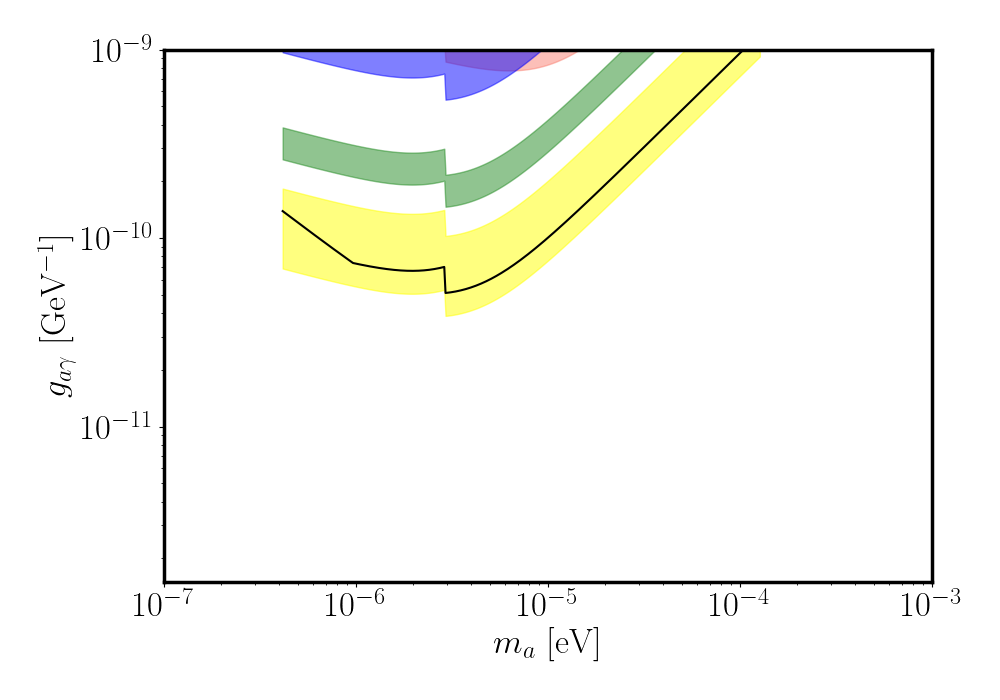

/home/chen/Code/axion_laser/github/workspace_notebooks/../astro.py:902: RuntimeWarning: divide by zero encountered in true_divide
  sqrt(Omega_obs/Omega_res)
/home/chen/Code/axion_laser/github/workspace_notebooks/../echo.py:1142: RuntimeWarning: divide by zero encountered in true_divide
  return ga_ref * sqrt(sn_val/sn_ref)


In [71]:
# canvas setup
fig, ax = gen_constraints(show_bounds=False);

# central instance
DM_profile = "NFW" #"Burkert" # "NFW"
longitude = 170 
latitude = 0. 
L_peak = 10**(25.5+1.6*2.)
t_peak = 10**1.7
t_trans = t_peak * 30./365
D = 1. #[kpc]
alpha = 0.5
gamma = ap.gamma_from_alpha(alpha)
ang_size = 1e-5
source_input = {'longitude':longitude,
                'latitude':latitude, 
                'distance':D, 
                'size':ang_size,
                't_age':1e4, 
                'alpha':alpha,
                'nu_pivot':1.,
                'gamma':gamma,
                'model': "eff", 'L_peak': L_peak, 't_peak': t_peak, 't_trans': t_trans
               }
ma_ref, ga_ref = pt.ma_from_nu(source_input['nu_pivot']), 1.e-10
axion_input = rt.ax_in(ma_ref, ga_ref)
data = {'deltaE_over_E':1.e-3,
        'f_Delta':0.721,
        'exper':'SKA',
        'total_observing_time':100.,
        'average':True,
        'verbose':0,
        'DM_profile': DM_profile
       }

t_peak = source_input['t_peak']
t_age = source_input['t_age']

Snu_echo_kwargs = {'tmin_default':None,
                   'Nt':10001,
                   'xmin':ct._au_over_kpc_,
                   'xmax_default':100.,
                   'use_quad':False,
                   'lin_space':False,
                   'Nint':int(30*(t_age)+1),
                   't_extra_old':None}

#add_band(show_ghosh=False, color='k', alpha=0.7)
add_band(show_ghosh=False, color='k', alpha=1., t_extra_old_arr=[4e4])





# instance 2 (burkert)
DM_profile = "Burkert" #"Burkert" # "NFW"
longitude = 170 
latitude = 0. 
L_peak = 10**(25.5+1.6*2.)
t_peak = 10**1.7
t_trans = t_peak * 30./365
D = 1. #[kpc]
alpha = 0.5
gamma = ap.gamma_from_alpha(alpha)
ang_size = 1e-4 
source_input = {'longitude':longitude,
                'latitude':latitude, 
                'distance':D, 
                'size':ang_size,
                't_age':1e4, 
                'alpha':alpha,
                'nu_pivot':1.,
                'gamma':gamma,
                'model': "eff", 'L_peak': L_peak, 't_peak': t_peak, 't_trans': t_trans
               }
ma_ref, ga_ref = pt.ma_from_nu(source_input['nu_pivot']), 1.e-10
axion_input = rt.ax_in(ma_ref, ga_ref)
data = {'deltaE_over_E':1.e-3,
        'f_Delta':0.721,
        'exper':'SKA',
        'total_observing_time':100.,
        'average':True,
        'verbose':0,
        'DM_profile': DM_profile
       }

t_peak = source_input['t_peak']
t_age = source_input['t_age']

Snu_echo_kwargs = {'tmin_default':None,
                   'Nt':10001,
                   'xmin':ct._au_over_kpc_,
                   'xmax_default':100.,
                   'use_quad':False,
                   'lin_space':False,
                   'Nint':int(30*(t_age)+1),
                   't_extra_old':None}

add_band(show_ghosh=False)







# one instance (longi 10)
DM_profile = "NFW" #"Burkert" # "NFW"
longitude = 10 
latitude = 0. 
L_peak = 10**(25.5+1.6*2.)
t_peak = 10**1.7
t_trans = t_peak * 30./365
D = 1. #[kpc]
alpha = 0.5
gamma = ap.gamma_from_alpha(alpha)
ang_size = 1e-4 
source_input = {'longitude':longitude,
                'latitude':latitude, 
                'distance':D, 
                'size':ang_size,
                't_age':1e4, 
                'alpha':alpha,
                'nu_pivot':1.,
                'gamma':gamma,
                'model': "eff", 'L_peak': L_peak, 't_peak': t_peak, 't_trans': t_trans
               }
ma_ref, ga_ref = pt.ma_from_nu(source_input['nu_pivot']), 1.e-10
axion_input = rt.ax_in(ma_ref, ga_ref)
data = {'deltaE_over_E':1.e-3,
        'f_Delta':0.721,
        'exper':'SKA',
        'total_observing_time':100.,
        'average':True,
        'verbose':0,
        'DM_profile': DM_profile
       }

t_peak = source_input['t_peak']
t_age = source_input['t_age']

Snu_echo_kwargs = {'tmin_default':None,
                   'Nt':10001,
                   'xmin':ct._au_over_kpc_,
                   'xmax_default':100.,
                   'use_quad':False,
                   'lin_space':False,
                   'Nint':int(30*(t_age)+1),
                   't_extra_old':None}

add_band(show_ghosh=False, color='salmon')






# instance (L_pk 1 sigma)
DM_profile = "NFW" #"Burkert" # "NFW"
longitude = 170 
latitude = 0. 
L_peak = 10**(25.5+1.6*1.)
t_peak = 10**1.7
t_trans = t_peak * 30./365
D = 1. #[kpc]
alpha = 0.5
gamma = ap.gamma_from_alpha(alpha)
ang_size = 1e-4 
source_input = {'longitude':longitude,
                'latitude':latitude, 
                'distance':D, 
                'size':ang_size,
                't_age':1e4, 
                'alpha':alpha,
                'nu_pivot':1.,
                'gamma':gamma,
                'model': "eff", 'L_peak': L_peak, 't_peak': t_peak, 't_trans': t_trans
               }
ma_ref, ga_ref = pt.ma_from_nu(source_input['nu_pivot']), 1.e-10
axion_input = rt.ax_in(ma_ref, ga_ref)
data = {'deltaE_over_E':1.e-3,
        'f_Delta':0.721,
        'exper':'SKA',
        'total_observing_time':100.,
        'average':True,
        'verbose':0,
        'DM_profile': DM_profile
       }

t_peak = source_input['t_peak']
t_age = source_input['t_age']

Snu_echo_kwargs = {'tmin_default':None,
                   'Nt':10001,
                   'xmin':ct._au_over_kpc_,
                   'xmax_default':100.,
                   'use_quad':False,
                   'lin_space':False,
                   'Nint':int(30*(t_age)+1),
                   't_extra_old':None}

add_band(show_ghosh=False, color='blue')



# central instance (D)
DM_profile = "NFW" #"Burkert" # "NFW"
longitude = 170 
latitude = 0. 
L_peak = 10**(25.5+1.6*2.)
t_peak = 10**1.7
t_trans = t_peak * 30./365
D = 0.45 #[kpc]
alpha = 0.5
gamma = ap.gamma_from_alpha(alpha)
ang_size = 1e-4 
source_input = {'longitude':longitude,
                'latitude':latitude, 
                'distance':D, 
                'size':ang_size,
                't_age':1e4, 
                'alpha':alpha,
                'nu_pivot':1.,
                'gamma':gamma,
                'model': "eff", 'L_peak': L_peak, 't_peak': t_peak, 't_trans': t_trans
               }
ma_ref, ga_ref = pt.ma_from_nu(source_input['nu_pivot']), 1.e-10
axion_input = rt.ax_in(ma_ref, ga_ref)
data = {'deltaE_over_E':1.e-3,
        'f_Delta':0.721,
        'exper':'SKA',
        'total_observing_time':100.,
        'average':True,
        'verbose':0,
        'DM_profile': DM_profile
       }

t_peak = source_input['t_peak']
t_age = source_input['t_age']

Snu_echo_kwargs = {'tmin_default':None,
                   'Nt':10001,
                   'xmin':ct._au_over_kpc_,
                   'xmax_default':100.,
                   'use_quad':False,
                   'lin_space':False,
                   'Nint':int(30*(t_age)+1),
                   't_extra_old':None}

add_band(show_ghosh=False, color='yellow')


plt.savefig('../plots/varying_one_param_at_a_time.pdf')

# Slices -- interactive

### $\ell-b$ contours

In [21]:
# do a few different locations for NFW and compare them to make the point

In [22]:
# then do a contour

In [72]:
# central instance
DM_profile = "NFW" #"Burkert" # "NFW"
longitude = 170 
latitude = 0. 
L_peak = 10**(25.5+1.6*2.)
t_peak = 10**1.7
t_trans = t_peak * 30./365
D = 1. #[kpc]
alpha = 0.5
gamma = ap.gamma_from_alpha(alpha)
ang_size = 1e-4 
source_input = {'longitude':longitude,
                'latitude':latitude, 
                'distance':D, 
                'size':ang_size,
                't_age':1e4, 
                'alpha':alpha,
                'nu_pivot':1.,
                'gamma':gamma,
                'model': "eff", 'L_peak': L_peak, 't_peak': t_peak, 't_trans': t_trans
               }
ma_ref, ga_ref = pt.ma_from_nu(source_input['nu_pivot']), 1.e-10
axion_input = rt.ax_in(ma_ref, ga_ref)
data = {'deltaE_over_E':1.e-3,
        'f_Delta':0.721,
        'exper':'SKA',
        'total_observing_time':100.,
        'average':True,
        'verbose':0,
        'DM_profile': DM_profile
       }

t_peak = source_input['t_peak']
t_age = source_input['t_age']

Snu_echo_kwargs = {'tmin_default':None,
                   'Nt':10001,
                   'xmin':ct._au_over_kpc_,
                   'xmax_default':100.,
                   'use_quad':False,
                   'lin_space':False,
                   'Nint':int(30*(t_age)+1),
                   't_extra_old':None}

In [75]:
# l-b contour
#t_extra_old = 4e4
t_extra_old_arr = [0., 1e3, 1e4, 2e4, 3e4, 4e4, 5e4]
z_val = 2.
l_span = 180
b_span = 90
l_arr = np.linspace(180-l_span, 180+l_span, 20)
b_arr = np.linspace(-b_span, b_span, 20)
(l_mesh, b_mesh) = np.meshgrid(l_arr, b_arr, indexing='ij')
(l_flat, b_flat) = (l_mesh.reshape(-1), b_mesh.reshape(-1))
                    
ga_flat = []

# prepare ma grid
Nma = 10
nulow = np.logspace(log10(ct._nu_min_ska_low_), log10(ct._nu_max_ska_low_), Nma//2)
numid = np.logspace(log10(ct._nu_min_ska_mid_), log10(ct._nu_max_ska_mid_), Nma - Nma//2)
ma_new = pt.ma_from_nu(np.concatenate((nulow, numid)))
ga_new = ga_ref

# scan
for i in tqdm(range(len(l_flat))):
    longitude = l_flat[i]
    latitude = b_flat[i]
    source_input['longitude'] = longitude
    source_input['latitude'] = latitude
    
    ga_reach = 1.
    for t_extra_old in t_extra_old_arr:
        Snu_echo_kwargs['t_extra_old'] = t_extra_old    
        routine_out = {}
        bounds_out = rt.full_routine(ma_new, ga_new, ga_ref, routine_out,
                                     source_input=source_input,
                                     data=data,
                                     Snu_echo_kwargs=Snu_echo_kwargs)
        ga_reach = min(ga_reach, min(ec.ga_reach(z_val, bounds_out['S/N'], bounds_out['ga'])))
    ga_flat.append(ga_reach)
    
ga_flat = np.array(ga_flat)
ga_mesh = ga_flat.reshape(l_mesh.shape)

100%|██████████| 900/900 [04:20<00:00,  3.45it/s]


<IPython.core.display.Javascript object>


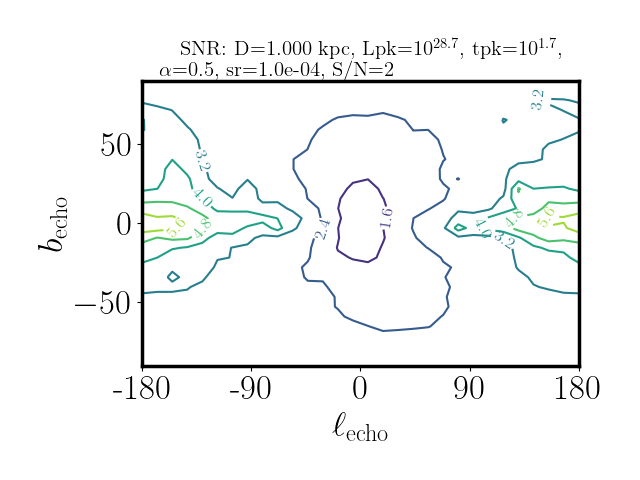

saved at ../plots/projection_old_logLpk_28.7_logtpk_1.7_snr_2_sr_1.0e-04_D_1.0_alpha_0.5_teo_vary_size_180x90.png


In [76]:
_, ax = plt.subplots()
#cs = plt.contour(l_mesh, b_mesh, np.log10(ga_mesh))
#cs = plt.contourf(l_mesh, b_mesh, np.log10(ga_mesh))
cs = plt.contour(l_mesh, b_mesh, ga_mesh*1e10)
#cs = plt.contourf(l_mesh, b_mesh, ga_mesh*1e10)
ax.clabel(cs, inline=1, fontsize=12)

#title_str = r"SNR: D={D:.3f} kpc, Lpk=10$^{{{log10Lpk:.1f}}}$, tpk=10$^{{{log10tpk:.1f}}}$,\\$\alpha$={alpha:.1f}, sr={sr:.1e}, S/N={sn:.0f}, t\_extra\_old={t_extra_old:.0f}"
#title_str = r"SNR: D={D:.3f} kpc, Lpk=10$^{{{log10Lpk:.1f}}}$, tpk=10$^{{{log10tpk:.1f}}}$,\\$\alpha$={alpha:.1f}, sr={sr:.1e}, S/N={sn:.0f}, t\_extra\_old=vary"
title_str = r"SNR: D={D:.3f} kpc, Lpk=10$^{{{log10Lpk:.1f}}}$, tpk=10$^{{{log10tpk:.1f}}}$,\\$\alpha$={alpha:.1f}, sr={sr:.1e}, S/N={sn:.0f}"
title = title_str.format(D=D,
                 log10Lpk=np.log10(L_peak), 
                 log10tpk=np.log10(t_peak),
#                  ell=longitude,
#                  b=latitude,
                 alpha=alpha,
                 sr=ang_size, 
                 sn=z_val) 
#                  t_extra_old=t_extra_old)

plt.title(title, fontdict={'size':15})
#plt.xlabel(r'$\ell - 180^\circ$')
plt.xlabel(r'$\ell_{\rm  echo}$')
plt.ylabel(r'$b_{\rm echo}$')
xold = (np.linspace(l_arr[0], l_arr[-1], 5)).astype(int)
xnew = xold - 180
plt.xticks(xold, xnew)
plt.tight_layout()
#plt.savefig('./plots/l_b_contours/projection_old_logLpk_%.1f_logtpk_%.1f_snr_%d_sr_%.1e_D_%.1f_alpha_%.1f_teo_%.0f_size_%.0fx%.0f.png' %(np.log10(L_peak), np.log10(t_peak), z_val, ang_size, D, alpha, t_extra_old, l_span, b_span))
plt.savefig('../plots/projection_old_logLpk_%.1f_logtpk_%.1f_snr_%d_sr_%.1e_D_%.1f_alpha_%.1f_teo_%s_size_%.0fx%.0f.png' %(np.log10(L_peak), np.log10(t_peak), z_val, ang_size, D, alpha, "vary", l_span, b_span))
print('saved at ../plots/projection_old_logLpk_%.1f_logtpk_%.1f_snr_%d_sr_%.1e_D_%.1f_alpha_%.1f_teo_%s_size_%.0fx%.0f.png' %(np.log10(L_peak), np.log10(t_peak), z_val, ang_size, D, alpha, "vary", l_span, b_span))


### $\ell$-distance contours

In [84]:
plt.rcParams['axes.linewidth'] = 1.5
plt.rc('font', family='serif',size=20)


In [85]:
# DM profile
DM_profile = "NFW" #"Burkert" # "NFW"
longitude = None
latitude = 0.

# SNR property
alpha = 0.5
nu_Biet = 5. # GHz
nu_pivot = 1.
L_peak_Biet = 10**(25.5+1.6*2.)
L_peak = L_peak_Biet * (nu_Biet/nu_pivot) ** alpha # converting Bietenholz freq to nupivot
t_peak = 10**1.7
t_trans = t_peak * 30./365
D = None 
gamma = ap.gamma_from_alpha(alpha)
ang_size = 1e-5
t_age = 1e4
t_extra_old = 4e4

source_input = {'longitude':longitude,
                'latitude':latitude, 
                'distance':D, 
                'size':ang_size,
                't_age':t_age, 
                'alpha':alpha,
                'nu_pivot':nu_pivot,
                'gamma':gamma,
                'model': "eff", 'L_peak': L_peak, 't_peak': t_peak, 't_trans': t_trans
               }

ma_ref, ga_ref = pt.ma_from_nu(source_input['nu_pivot']), 1.e-10
axion_input = rt.ax_in(ma_ref, ga_ref)

data = {'deltaE_over_E':1.e-3,
        'f_Delta':0.721,
        'exper':'SKA',
        'total_observing_time':100.,
        'average':True,
        'verbose':0,
        'DM_profile': DM_profile
       }

t_peak = source_input['t_peak']
t_age = source_input['t_age']

Snu_echo_kwargs = {'tmin_default':None,
                   'Nt':10001,
                   'xmin':ct._au_over_kpc_,
                   'xmax_default':100.,
                   'use_quad':False,
                   'lin_space':False,
                   'Nint':int(30*(t_age)+1),
                   't_extra_old':t_extra_old}    

z_val = 2.
ga_flat = []

# # prepare ma grid
# Nma = 20
# nulow = np.logspace(log10(ct._nu_min_ska_low_), log10(ct._nu_max_ska_low_), Nma//2)
# numid = np.logspace(log10(ct._nu_min_ska_mid_), log10(ct._nu_max_ska_mid_), Nma - Nma//2)
# ma_new = pt.ma_from_nu(np.concatenate((nulow, numid)))
# ga_new = ga_ref

# alternatively: fix ma to 1GHz
ma_new = np.array([pt.ma_from_nu(1)])
ga_new = ga_ref



In [86]:
ell_arr = np.linspace(180, 360, 50)
D_arr = np.logspace(-1, 0.5, 30)
ell_mesh, D_mesh = np.meshgrid(ell_arr, D_arr, indexing='ij')
ell_flat, D_flat = ell_mesh.reshape(-1), D_mesh.reshape(-1)


def scan(i):
    # scan
    source_input['longitude'] = ell_flat[i]
    source_input['distance'] = D_flat[i]
    ga_reach = 1. 
    routine_out = {}
    bounds_out = rt.full_routine(ma_new, ga_new, ga_ref, routine_out,
                                 source_input=source_input,
                                 data=data,
                                 Snu_echo_kwargs=Snu_echo_kwargs)
    ga_reach = min(ga_reach, min(ec.ga_reach(z_val, bounds_out['S/N'], bounds_out['ga'])))
    return ga_reach

In [87]:
# python 2 probably needs to use contextlib as 
# Pool() wasn't a context manager in 2.x yet
# from contextlib import closing
# with closing(Pool(processes=2)) as pool:

with Pool() as pool:
    ga_flat = pool.map(scan, range(len(ell_flat)))
    pool.close()
    pool.join()
    
ga_flat = np.array(ga_flat)
ga_mesh = ga_flat.reshape(ell_mesh.shape)    

<IPython.core.display.Javascript object>


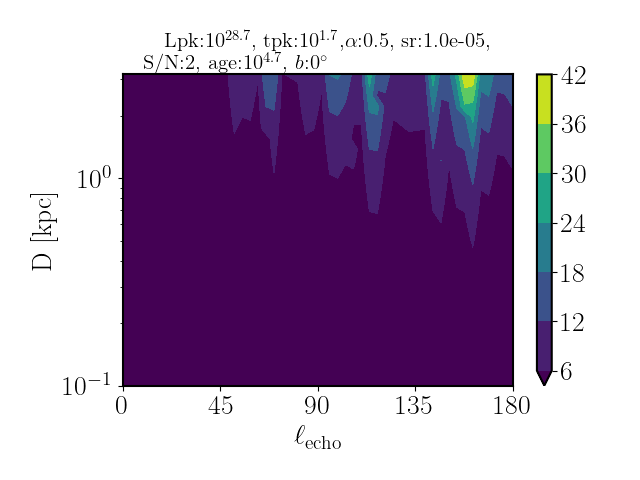

In [88]:
_, ax = plt.subplots()
#cs = plt.contour(ell_mesh, D_mesh, np.log10(ga_mesh))
#cs = plt.contour(ell_mesh, D_mesh, ga_mesh*1e10)
cs = plt.contourf(ell_mesh, D_mesh, ga_mesh*1e10, extend='min')
#ax.clabel(cs, inline=1, fontsize=12)

title_str = r"Lpk:10$^{{{log10Lpk:.1f}}}$, tpk:10$^{{{log10tpk:.1f}}}$,$\alpha$:{alpha:.1f}, sr:{sr:.1e}, \\S/N:{sn:.0f}, age:10$^{{{log10age:.1f}}}$, $b$:{b:.0f}$^\circ$"
title = title_str.format(
                 log10Lpk=np.log10(L_peak_Biet), 
                 log10tpk=np.log10(t_peak),
                 alpha=alpha,
                 sr=ang_size, 
                 sn=z_val,
                log10age=np.log10(source_input['t_age'] + Snu_echo_kwargs['t_extra_old']),
#                 ell=longitude,
                 b=latitude
)

xold = (np.linspace(ell_arr[0], ell_arr[-1], 5)).astype(int)
xnew = xold - 180
plt.xticks(xold, xnew)
plt.title(title, fontdict={'size':15})
plt.xlabel(r'$\ell_{\rm  echo}$')
plt.ylabel('D [kpc]')
plt.yscale('log')
cbar = plt.colorbar(cs)
plt.tight_layout()

path = '../plots/projection_D_ell_scan.pdf'
plt.savefig(path)

### age-$t_{trans}/t_{pk}$ contours

In [89]:
plt.rcParams['axes.linewidth'] = 1.5
plt.rc('font', family='serif',size=20)

In [90]:
# DM profile
DM_profile = "NFW" #"Burkert" # "NFW"
longitude = 170.
latitude = 0.

# SNR property
alpha = 0.5
nu_Biet = 5. # GHz
nu_pivot = 1.
L_peak_Biet = 10**(25.5+1.6*2.)
L_peak = L_peak_Biet * (nu_Biet/nu_pivot) ** alpha # converting Bietenholz freq to nupivot
t_peak = 10**1.7
t_trans = None
D = 0.5 #[kpc]
gamma = ap.gamma_from_alpha(alpha)
ang_size = 1e-4 
t_age = 1e4

source_input = {'longitude':longitude,
                'latitude':latitude, 
                'distance':D, 
                'size':ang_size,
                't_age':t_age, 
                'alpha':alpha,
                'nu_pivot':nu_pivot,
                'gamma':gamma,
                'model': "eff", 'L_peak': L_peak, 't_peak': t_peak, 't_trans': t_trans
               }
ma_ref, ga_ref = pt.ma_from_nu(source_input['nu_pivot']), 1.e-10
axion_input = rt.ax_in(ma_ref, ga_ref)
data = {'deltaE_over_E':1.e-3,
        'f_Delta':0.721,
        'exper':'SKA',
        'total_observing_time':100.,
        'average':True,
        'verbose':0,
        'DM_profile': DM_profile
       }

t_peak = source_input['t_peak']
t_age = source_input['t_age']

Snu_echo_kwargs = {'tmin_default':None,
                   'Nt':10001,
                   'xmin':ct._au_over_kpc_,
                   'xmax_default':100.,
                   'use_quad':False,
                   'lin_space':False,
                   'Nint':int(30*(t_age)+1),
                   't_extra_old':None}    

z_val = 2.
ga_flat = []

# # prepare ma grid
# Nma = 20
# nulow = np.logspace(log10(ct._nu_min_ska_low_), log10(ct._nu_max_ska_low_), Nma//2)
# numid = np.logspace(log10(ct._nu_min_ska_mid_), log10(ct._nu_max_ska_mid_), Nma - Nma//2)
# ma_new = pt.ma_from_nu(np.concatenate((nulow, numid)))
# ga_new = ga_ref

# alternatively: fix ma to 1GHz
ma_new = np.array([pt.ma_from_nu(1.)])
ga_new = ga_ref


In [91]:
age_arr = np.linspace(0, 6e4, 50)
trpk_arr = np.linspace(10, 50, 30)
age_mesh, trpk_mesh = np.meshgrid(age_arr, trpk_arr, indexing='ij')
age_flat, trpk_flat = age_mesh.reshape(-1), trpk_mesh.reshape(-1)


def scan(i):
    # scan
    Snu_echo_kwargs['t_extra_old'] = age_flat[i]
    source_input['t_trans'] = trpk_flat[i] * source_input['t_peak'] / 365
    ga_reach = 1. 
    routine_out = {}
    bounds_out = rt.full_routine(ma_new, ga_new, ga_ref, routine_out,
                                 source_input=source_input,
                                 data=data,
                                 Snu_echo_kwargs=Snu_echo_kwargs)
    ga_reach = min(ga_reach, min(ec.ga_reach(z_val, bounds_out['S/N'], bounds_out['ga'])))
    return ga_reach

In [92]:
# python 2 probably needs to use contextlib as 
# Pool() wasn't a context manager in 2.x yet
# from contextlib import closing
# with closing(Pool(processes=2)) as pool:
with Pool() as pool:
    ga_flat = pool.map(scan, range(len(age_flat)))
    pool.close()
    pool.join()
    
ga_flat = np.array(ga_flat)
ga_mesh = ga_flat.reshape(age_mesh.shape)    

<IPython.core.display.Javascript object>


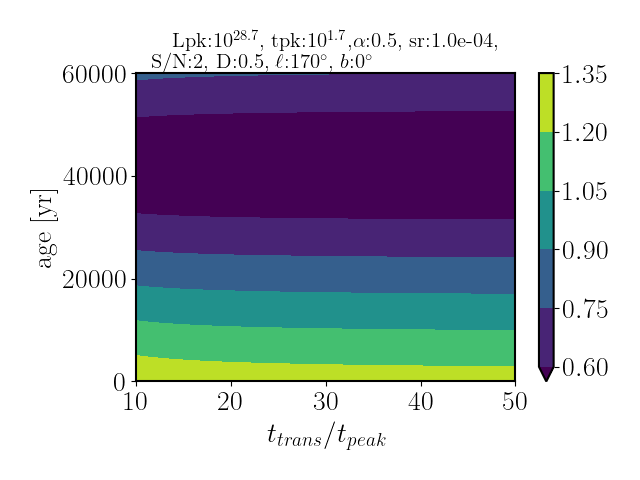

In [93]:
_, ax = plt.subplots()
#cs = plt.contour(ell_mesh, D_mesh, np.log10(ga_mesh))
#cs = plt.contour(ell_mesh, D_mesh, ga_mesh*1e10)
#cs = plt.contourf(ell_mesh, D_mesh, ga_mesh*1e10, extend='min')
#ax.clabel(cs, inline=1, fontsize=12)
cs = plt.contourf(trpk_mesh, age_mesh, ga_mesh*1e10, extend='min')

title_str = r"Lpk:10$^{{{log10Lpk:.1f}}}$, tpk:10$^{{{log10tpk:.1f}}}$,$\alpha$:{alpha:.1f}, sr:{sr:.1e}, \\S/N:{sn:.0f}, D:{D:.1f}, $\ell$:{ell:.0f}$^\circ$, $b$:{b:.0f}$^\circ$"
title = title_str.format(
                 log10Lpk=np.log10(L_peak_Biet), 
                 log10tpk=np.log10(t_peak),
                 alpha=alpha,
                 sr=ang_size, 
                 sn=z_val, 
                 D=D,
                ell=longitude,
                b=latitude)

plt.title(title, fontdict={'size':15})
plt.xlabel(r'$t_{trans}/t_{peak}$')
plt.ylabel(r'age [yr]')
#plt.yscale('log')
cbar = plt.colorbar(cs)
plt.tight_layout()

path = '../plots/projection_ttranstpk_age_scan.pdf'
plt.savefig(path)

### $L_{pk} - t_{pk}$ contours

In [131]:
plt.rcParams['axes.linewidth'] = 1.5
plt.rc('font', family='serif',size=20)

In [132]:
# DM profile
DM_profile = "NFW" #"Burkert" # "NFW"
longitude = 170.
latitude = 0.

# SNR property
alpha = 0.5
nu_Biet = 5. # GHz
nu_pivot = 1.
L_peak = None 
t_peak = None #10**1.7
t_trans = None
D = 0.5 #[kpc]
gamma = ap.gamma_from_alpha(alpha)
ang_size = 1e-4 
t_age = 1e4
t_extra_old = 4e4

source_input = {'longitude':longitude,
                'latitude':latitude, 
                'distance':D, 
                'size':ang_size,
                't_age':t_age, 
                'alpha':alpha,
                'nu_pivot':nu_pivot,
                'gamma':gamma,
                'model': "eff", 'L_peak': L_peak, 't_peak': t_peak, 't_trans': t_trans
               }
ma_ref, ga_ref = pt.ma_from_nu(source_input['nu_pivot']), 1.e-10
axion_input = rt.ax_in(ma_ref, ga_ref)
data = {'deltaE_over_E':1.e-3,
        'f_Delta':0.721,
        'exper':'SKA',
        'total_observing_time':100.,
        'average':True,
        'verbose':0,
        'DM_profile': DM_profile
       }

t_age = source_input['t_age']
Snu_echo_kwargs = {'tmin_default':None,
                   'Nt':10001,
                   'xmin':ct._au_over_kpc_,
                   'xmax_default':100.,
                   'use_quad':False,
                   'lin_space':False,
                   'Nint':int(30*(t_age)+1),
                   't_extra_old':t_extra_old}    

z_val = 2.
ga_flat = []

# # prepare ma grid
# Nma = 20
# nulow = np.logspace(log10(ct._nu_min_ska_low_), log10(ct._nu_max_ska_low_), Nma//2)
# numid = np.logspace(log10(ct._nu_min_ska_mid_), log10(ct._nu_max_ska_mid_), Nma - Nma//2)
# ma_new = pt.ma_from_nu(np.concatenate((nulow, numid)))
# ga_new = ga_ref

# alternatively: fix ma to 1GHz
ma_new = np.array([pt.ma_from_nu(1)])
ga_new = ga_ref


In [146]:
Lpk_Biet_arr = np.logspace(25.5-1.6*3., 25.5+1.6*3., 50)
Lpk_arr = Lpk_Biet_arr * (nu_Biet/nu_pivot) ** alpha # convert to Pivot freq
tpk_arr = np.logspace(1.7-0.9*3, 1.7+0.9*3, 30)

Lpk_mesh, tpk_mesh = np.meshgrid(Lpk_arr, tpk_arr, indexing='ij')
Lpk_Biet_mesh, _ = np.meshgrid(Lpk_Biet_arr, tpk_arr, indexing='ij')

Lpk_flat, tpk_flat = Lpk_mesh.reshape(-1), tpk_mesh.reshape(-1)


def scan(i, debug=False):
    # scan
    source_input['L_peak'] = Lpk_flat[i]
    source_input['t_peak'] = tpk_flat[i]
    source_input['t_trans'] = 30. * source_input['t_peak'] / 365.
    ga_reach = 1. 
    routine_out = {}
    bounds_out = rt.full_routine(ma_new, ga_new, ga_ref, routine_out,
                                 source_input=source_input,
                                 data=data,
                                 Snu_echo_kwargs=Snu_echo_kwargs)
    #print(bounds_out.keys())
    #print(bounds_out['ga'])
    ga_reach = min(ga_reach, min(ec.ga_reach(z_val, bounds_out['S/N'], bounds_out['ga'])))
    if debug is False:
        return ga_reach
    else:
        return ga_reach, bounds_out

In [142]:
_, bounds_out = scan(2, debug=True)
bounds_out

{'echo_Snu': array([9.20758827e-15]),
 'signal_nu': array([1.]),
 'signal_delnu': array([0.001]),
 'signal_Omega': 0.0001,
 'signal_Snu': array([9.20758827e-15]),
 'signal_S_echo': array([1.47290338e-44]),
 'signal_power': array([2.18185832e-25]),
 'noise_nu': array([1.]),
 'noise_delnu': array([0.001]),
 'noise_Omega_res': array(7.20993788e-08),
 'noise_Omega_obs': 0.0001,
 'noise_T408': array(42.091976, dtype=float32),
 'noise_Tnu': array([30.00489852]),
 'noise_power': array([5.29582564e-16]),
 'S/N': array([4.11995876e-10]),
 'ma': array([8.27133561e-06]),
 'ga': 1e-10}

In [143]:
# python 2 probably needs to use contextlib as 
# Pool() wasn't a context manager in 2.x yet
# from contextlib import closing
# with closing(Pool(processes=2)) as pool:
with Pool() as pool:
    ga_flat = pool.map(scan, range(len(tpk_flat)))
    pool.close()
    pool.join()
    
ga_flat = np.array(ga_flat)
ga_mesh = ga_flat.reshape(tpk_mesh.shape)    

<IPython.core.display.Javascript object>


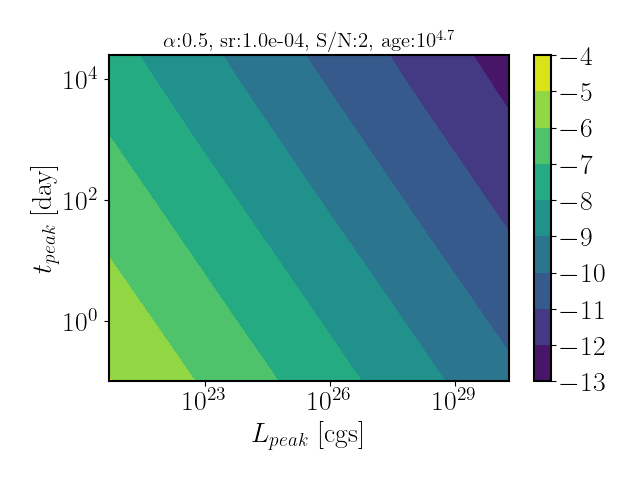

In [148]:
_, ax = plt.subplots()
#cs = plt.contour(ell_mesh, D_mesh, np.log10(ga_mesh))
#cs = plt.contour(ell_mesh, D_mesh, ga_mesh*1e10)
#cs = plt.contourf(ell_mesh, D_mesh, ga_mesh*1e10, extend='min')
#ax.clabel(cs, inline=1, fontsize=12)
#cs = plt.contourf(Lpk_mesh, tpk_mesh, ga_mesh*1e10, extend='min')
#cs = plt.contourf(Lpk_mesh, tpk_mesh, np.log10(ga_mesh), extend='min')
cs = plt.contourf(Lpk_Biet_mesh, tpk_mesh, np.log10(ga_mesh))#, extend='min')

title_str = r"$\alpha$:{alpha:.1f}, sr:{sr:.1e}, S/N:{sn:.0f}, age:10$^{{{log10age:.1f}}}$"
title = title_str.format(
                 alpha=alpha,
                 sr=ang_size, 
                 sn=z_val,
                 log10age=np.log10(source_input['t_age'] + Snu_echo_kwargs['t_extra_old']) )

plt.title(title, fontdict={'size':15})
plt.xlabel(r'$L_{peak}$ [cgs]')
plt.ylabel(r'$t_{peak}$ [day]')
plt.yscale('log')
plt.xscale('log')
cbar = plt.colorbar(cs)
plt.tight_layout()

path = '../plots/projection_Lpk_tpk_scan.pdf'
#plt.savefig(path)

# Plots with script runs

Every below requires running run_custom.py to generate the data file first.

### CASE 1: Lpk-tpk

`python ./run_custom.py --run 0 --nuB 5 --Nsteps 30 Lpk-tpk --dist 0.5 --tt_ratio 30 --t0 1e4 --t_extra 4e4 --long_lat 178 0`

warning!!! multiple runs are found with the same runid. This could be problematic. Choosing the first one.


<IPython.core.display.Javascript object>


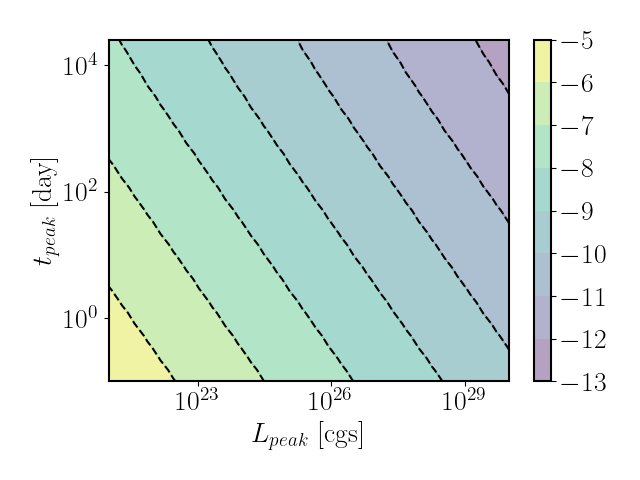

In [364]:
run_id = 0
ga_ref = 1e-10
mode = 'Lpk-tpk'

# import results
path = '../output/custom_snr/%s/' %mode
name = 'run_%d_sn_*' %run_id
file_list = glob(os.path.join(path,name))
if len(file_list) > 1:
    print('warning!!! multiple runs are found with the same runid. This could be problematic. Choosing the first one.')
target = file_list[0]
snr_flat = np.loadtxt(target, delimiter=',')

# import grid
path = '../output/custom_snr/%s/' %mode
name = 'run_%d_*y.txt' %run_id
target = glob(os.path.join(path,name))[0]
y_arr = np.loadtxt(target, delimiter=',')

path = '../output/custom_snr/%s/' %mode
name = 'run_%d_*x.txt' %run_id
target = glob(os.path.join(path,name))[0]
x_arr = np.loadtxt(target, delimiter=',')

# compute reach 
ga_reach_flat = ec.ga_reach(2, snr_flat, ga_ref) 

# plot
plt.subplots()
cs = plt.contourf(x_arr, y_arr, log10(ga_reach_flat), alpha=0.4)
plt.colorbar(cs)
plt.contour(x_arr, y_arr, np.log10(ga_reach_flat), colors=['k'], linestyles=['--'])
plt.yscale('log')
plt.xscale('log')
# plt.title(title, fontdict={'size':15})
plt.xlabel(r'$L_{peak}$ [cgs]')
plt.ylabel(r'$t_{peak}$ [day]')
plt.tight_layout()

path = '../plots/projection_case1_Lpk_tpk_scan.pdf'
plt.savefig(path)

In [365]:
10**(ct._mu_log10_Lpk_ + ct._sig_log10_Lpk_ * 2.)

3.1622776601683795e+28

In [366]:
10**(ct._mu_log10_tpk_)

50.11872336272722

### CASE 2: $t_{trans}/t_{peak}$ vs $t_0$

`python ./run_custom.py --run 0 --nuB 5 --Nsteps 30 r-tsig --Lpk 3.16e28 --tpk 50.1 --dist 0.5 --long_lat 178 0`

warning!!! multiple runs are found with the same runid. This could be problematic. Choosing the first one.


<IPython.core.display.Javascript object>


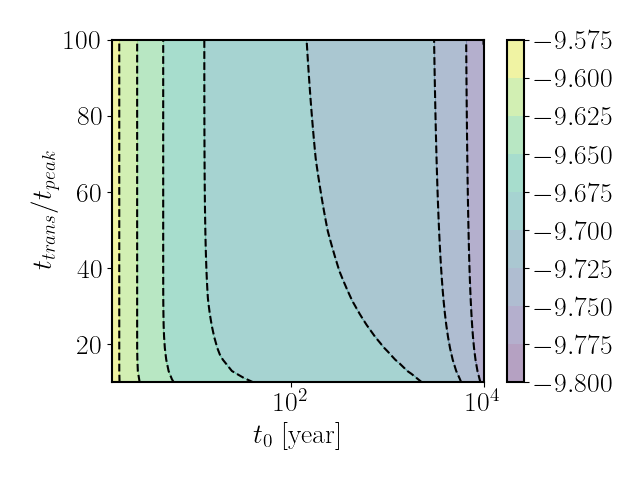

In [367]:
run_id = 0
ga_ref = 1e-10
mode = 'r-tsig'

# import results
path = '../output/custom_snr/%s/' %mode
name = 'run_%d_sn_*' %run_id
file_list = glob(os.path.join(path,name))
if len(file_list) > 1:
    print('warning!!! multiple runs are found with the same runid. This could be problematic. Choosing the first one.')
target = file_list[0]
snr_flat = np.loadtxt(target, delimiter=',')

# import grid
path = '../output/custom_snr/%s/' %mode
name = 'run_%d_*y.txt' %run_id
target = glob(os.path.join(path,name))[0]
y_arr = np.loadtxt(target, delimiter=',')

path = '../output/custom_snr/%s/' %mode
name = 'run_%d_*x.txt' %run_id
target = glob(os.path.join(path,name))[0]
x_arr = np.loadtxt(target, delimiter=',')

# compute reach 
ga_reach_flat = ec.ga_reach(2, snr_flat, ga_ref) 

# plot
plt.subplots()
cs = plt.contourf(x_arr, y_arr, log10(ga_reach_flat), alpha=0.4)
plt.colorbar(cs)
plt.contour(x_arr, y_arr, np.log10(ga_reach_flat), colors=['k'], linestyles=['--'])
# plt.yscale('log')
plt.xscale('log')

plt.xlabel(r'$t_{0}$ [year]')
plt.ylabel(r'$t_{trans}/t_{peak}$')
plt.tight_layout()
path = '../plots/projection_case2_r-tsig.pdf'
plt.savefig(path)

### CASE 3: ttrans vs $t_{extra}$
    
`python ./run_custom.py --run 0 --nuB 5 --Nsteps 30 r-tex --Lpk 3.16e28 --tpk 50.1 --dist 0.5 --long_lat 178 0`

warning!!! multiple runs are found with the same runid. This could be problematic. Choosing the first one.


<IPython.core.display.Javascript object>


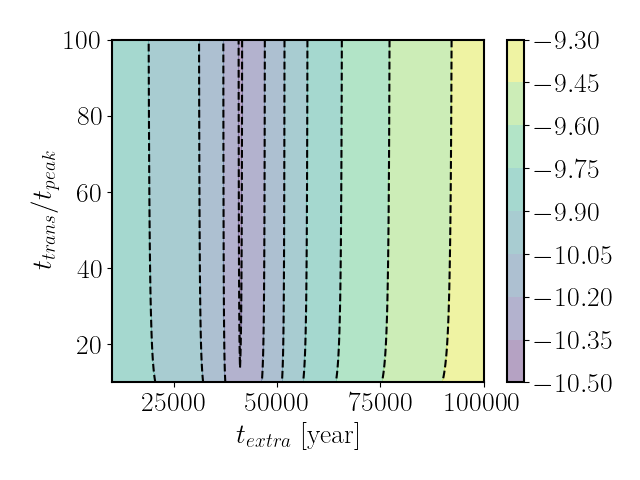

In [368]:
run_id = 0
ga_ref = 1e-10
mode = 'r-tex'

# import results
path = '../output/custom_snr/%s/' %mode
name = 'run_%d_sn_*' %run_id
file_list = glob(os.path.join(path,name))
if len(file_list) > 1:
    print('warning!!! multiple runs are found with the same runid. This could be problematic. Choosing the first one.')
target = file_list[0]
snr_flat = np.loadtxt(target, delimiter=',')

# import grid
path = '../output/custom_snr/%s/' %mode
name = 'run_%d_*y.txt' %run_id
target = glob(os.path.join(path,name))[0]
y_arr = np.loadtxt(target, delimiter=',')

path = '../output/custom_snr/%s/' %mode
name = 'run_%d_*x.txt' %run_id
target = glob(os.path.join(path,name))[0]
x_arr = np.loadtxt(target, delimiter=',')

# compute reach 
ga_reach_flat = ec.ga_reach(2, snr_flat, ga_ref) 

# plot
plt.subplots()
cs = plt.contourf(x_arr, y_arr, log10(ga_reach_flat), alpha=0.4)
plt.colorbar(cs)
plt.contour(x_arr, y_arr, np.log10(ga_reach_flat), colors=['k'], linestyles=['--'])
# plt.yscale('log')
# plt.xscale('log')
plt.xlim(1e4, 1e5)

plt.xlabel(r'$t_{extra}$ [year]')
plt.ylabel(r'$t_{trans}/t_{peak}$')
plt.tight_layout()
path = '../plots/projection_case3_r_tex_scan.pdf'
plt.savefig(path)

### CASE 4: $\ell$ vs $D$
    
`python ./run_custom.py --run 0 --nuB 5 --Nsteps 100 l-D --Lpk 3.16e28 --tpk 50.1 --tt_ratio 30 --t0 1e4 --t_extra 4e4 --lat 0`

warning!!! multiple runs are found with the same runid. This could be problematic. Choosing the first one.


<IPython.core.display.Javascript object>


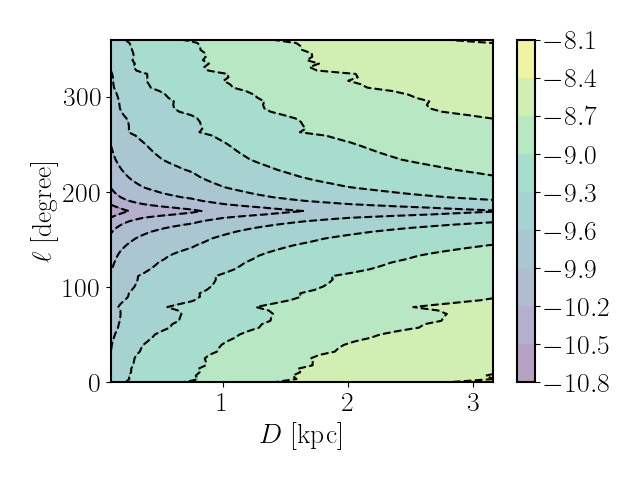

In [369]:
run_id = 0
ga_ref = 1e-10
mode = 'l-D'

# import results
path = '../output/custom_snr/%s/' %mode
name = 'run_%d_sn_*' %run_id
file_list = glob(os.path.join(path,name))
if len(file_list) > 1:
    print('warning!!! multiple runs are found with the same runid. This could be problematic. Choosing the first one.')
target = file_list[0]
snr_flat = np.loadtxt(target, delimiter=',')

# import grid
path = '../output/custom_snr/%s/' %mode
name = 'run_%d_*y.txt' %run_id
target = glob(os.path.join(path,name))[0]
y_arr = np.loadtxt(target, delimiter=',')

path = '../output/custom_snr/%s/' %mode
name = 'run_%d_*x.txt' %run_id
target = glob(os.path.join(path,name))[0]
x_arr = np.loadtxt(target, delimiter=',')

# compute reach 
ga_reach_flat = ec.ga_reach(2, snr_flat, ga_ref) 

# plot
plt.subplots()
cs = plt.contourf(x_arr, y_arr, log10(ga_reach_flat), alpha=0.4)
plt.colorbar(cs)
plt.contour(x_arr, y_arr, np.log10(ga_reach_flat), colors=['k'], linestyles=['--'])
# plt.yscale('log')
## plt.xscale('log')

plt.xlabel(r'$D$ [kpc]')
plt.ylabel(r'$\ell$ [degree]')
plt.tight_layout()
path = '../plots/projection_case4_l_D_scan.pdf'
plt.savefig(path)

In [370]:
ct.angle_to_solid_angle(0.0155)

0.00018869096431612964

In [371]:
5e4/2/1000/3.236*1e-3 / 0.5

0.015451174289245983

### CASE 5: $\ell$ vs $b$
    
`python ./run_custom.py --run 0 --nuB 5 --Nsteps 30 l-b --Lpk 3.16e28 --tpk 50.1 --dist 0.5 --tt_ratio 30 --t0 1e4 --t_extra 4e4`

warning!!! multiple runs are found with the same runid. This could be problematic. Choosing the first one.


<IPython.core.display.Javascript object>


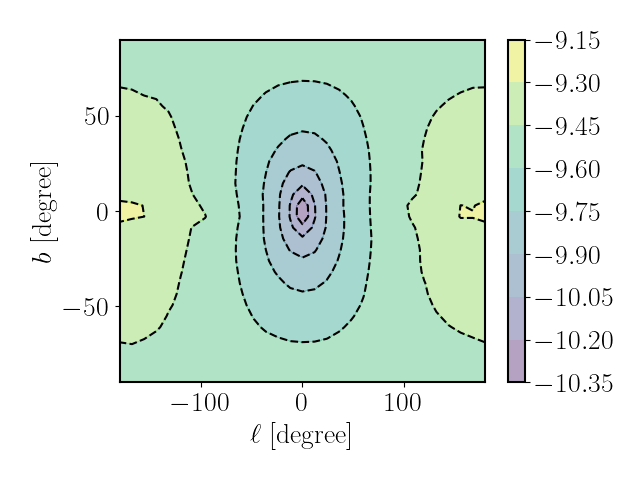

In [372]:
run_id = 0
ga_ref = 1e-10
mode = 'l-b'

# import results
path = '../output/custom_snr/%s/' %mode
name = 'run_%d_sn_*' %run_id
file_list = glob(os.path.join(path,name))
if len(file_list) > 1:
    print('warning!!! multiple runs are found with the same runid. This could be problematic. Choosing the first one.')
target = file_list[0]
snr_flat = np.loadtxt(target, delimiter=',')

# import grid
path = '../output/custom_snr/%s/' %mode
name = 'run_%d_*y.txt' %run_id
target = glob(os.path.join(path,name))[0]
y_arr = np.loadtxt(target, delimiter=',')

path = '../output/custom_snr/%s/' %mode
name = 'run_%d_*x.txt' %run_id
target = glob(os.path.join(path,name))[0]
x_arr = np.loadtxt(target, delimiter=',')

# compute reach 
ga_reach_flat = ec.ga_reach(2, snr_flat, ga_ref) 

# plot
plt.subplots()
cs = plt.contourf(y_arr-180, -x_arr, log10(ga_reach_flat.T), alpha=0.4)
plt.colorbar(cs)
plt.contour(y_arr-180, -x_arr, np.log10(ga_reach_flat.T), colors=['k'], linestyles=['--'])
# plt.yscale('log')
# plt.xscale('log')

plt.ylabel(r'$b$ [degree]')
plt.xlabel(r'$\ell$ [degree]')
plt.tight_layout()
path = '../plots/projection_case5_l_b_scan.pdf'
plt.savefig(path)

### CASE 6: D-t
`python ./run_custom.py --run 0 --nuB 5 --Nsteps 30 D-t --Lpk 3.16e28 --tpk 50.1 --tt_ratio 30 -lb 178 0`

<IPython.core.display.Javascript object>


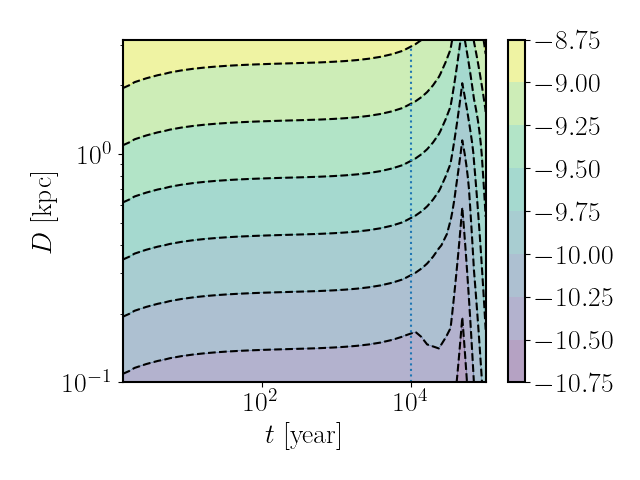

In [378]:
run_id = 0
ga_ref = 1e-10
mode = 'D-t'

# import results
path = '../output/custom_snr/%s/' %mode
name = 'run_%d_sn_*' %run_id
file_list = glob(os.path.join(path,name))
if len(file_list) > 1:
    print('warning!!! multiple runs are found with the same runid. This could be problematic. Choosing the first one.')
target = file_list[0]
snr_flat = np.loadtxt(target, delimiter=',')

# import grid
path = '../output/custom_snr/%s/' %mode
name = 'run_%d_*y.txt' %run_id
target = glob(os.path.join(path,name))[0]
y_arr = np.loadtxt(target, delimiter=',')

path = '../output/custom_snr/%s/' %mode
name = 'run_%d_*x.txt' %run_id
target = glob(os.path.join(path,name))[0]
x_arr = np.loadtxt(target, delimiter=',')

# compute reach 
ga_reach_flat = ec.ga_reach(2, snr_flat, ga_ref) 

# plot
plt.subplots()
cs = plt.contourf(x_arr, y_arr, log10(ga_reach_flat), alpha=0.4)
plt.colorbar(cs)
plt.contour(x_arr, y_arr, np.log10(ga_reach_flat), colors=['k'], linestyles=['--'])
plt.yscale('log')
plt.xscale('log')
plt.vlines(1e4, 1e-1, 3, ls=':')

plt.xlabel(r'$t$ [year]')
plt.ylabel(r'$D$ [kpc]')
plt.tight_layout()
path = '../plots/projection_case6_D_t_scan.pdf'
plt.savefig(path)

### CASE 7: $\ell$-t
`python ./run_custom.py --run 0 --nuB 5 --Nsteps 100 l-t --Lpk 3.16e28 --tpk 50.1 --tt_ratio 30 -D 0.5 -b 0`

<IPython.core.display.Javascript object>


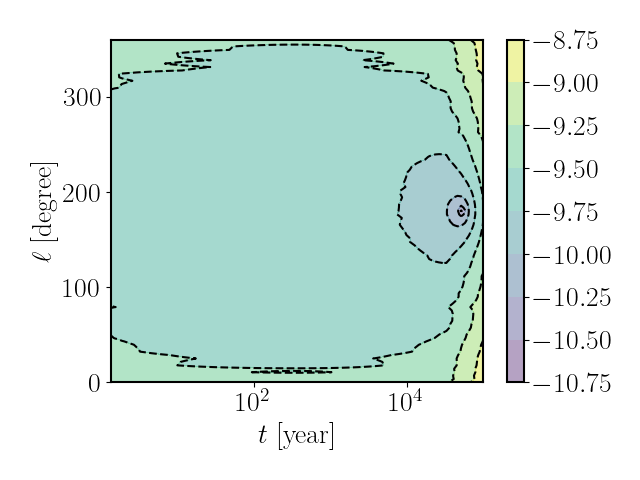

In [374]:
run_id = 0
ga_ref = 1e-10
mode = 'l-t'

# import results
path = '../output/custom_snr/%s/' %mode
name = 'run_%d_sn_*' %run_id
file_list = glob(os.path.join(path,name))
if len(file_list) > 1:
    print('warning!!! multiple runs are found with the same runid. This could be problematic. Choosing the first one.')
target = file_list[0]
snr_flat = np.loadtxt(target, delimiter=',')

# import grid
path = '../output/custom_snr/%s/' %mode
name = 'run_%d_*y.txt' %run_id
target = glob(os.path.join(path,name))[0]
y_arr = np.loadtxt(target, delimiter=',')

path = '../output/custom_snr/%s/' %mode
name = 'run_%d_*x.txt' %run_id
target = glob(os.path.join(path,name))[0]
x_arr = np.loadtxt(target, delimiter=',')

# compute reach 
ga_reach_flat = ec.ga_reach(2, snr_flat, ga_ref) 

# plot
plt.subplots()
cs = plt.contourf(x_arr, y_arr, log10(ga_reach_flat), alpha=0.4)
plt.colorbar(cs)
plt.contour(x_arr, y_arr, np.log10(ga_reach_flat), colors=['k'], linestyles=['--'])
#plt.yscale('log')
plt.xscale('log')

plt.xlabel(r'$t$ [year]')
plt.ylabel(r'$\ell$ [degree]')
plt.tight_layout()
path = '../plots/projection_case7_l_t_scan.pdf'
plt.savefig(path)

### CASE 8: $b$-t
`python ./run_custom.py --run 0 --nuB 5 --Nsteps 100 b-t --Lpk 3.16e28 --tpk 50.1 --tt_ratio 30 -D 0.5 -l 178`

<IPython.core.display.Javascript object>


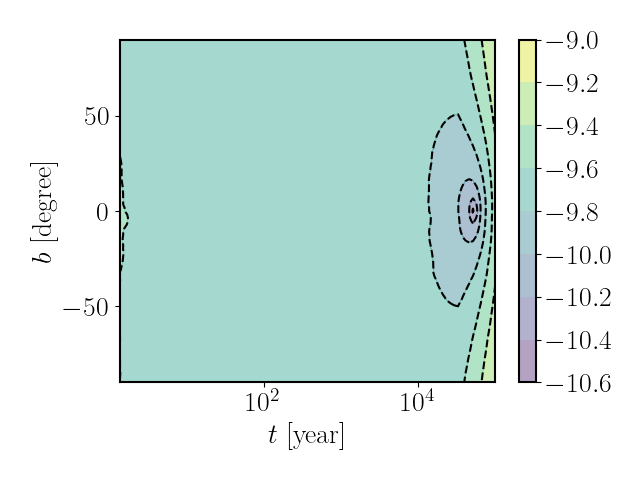

In [375]:
run_id = 0
ga_ref = 1e-10
mode = 'b-t'

# import results
path = '../output/custom_snr/%s/' %mode
name = 'run_%d_sn_*' %run_id
file_list = glob(os.path.join(path,name))
if len(file_list) > 1:
    print('warning!!! multiple runs are found with the same runid. This could be problematic. Choosing the first one.')
target = file_list[0]
snr_flat = np.loadtxt(target, delimiter=',')

# import grid
path = '../output/custom_snr/%s/' %mode
name = 'run_%d_*y.txt' %run_id
target = glob(os.path.join(path,name))[0]
y_arr = np.loadtxt(target, delimiter=',')

path = '../output/custom_snr/%s/' %mode
name = 'run_%d_*x.txt' %run_id
target = glob(os.path.join(path,name))[0]
x_arr = np.loadtxt(target, delimiter=',')

# compute reach 
ga_reach_flat = ec.ga_reach(2, snr_flat, ga_ref) 

# plot
plt.subplots()
cs = plt.contourf(x_arr, y_arr, log10(ga_reach_flat), alpha=0.4)
plt.colorbar(cs)
plt.contour(x_arr, y_arr, np.log10(ga_reach_flat), colors=['k'], linestyles=['--'])
#plt.yscale('log')
plt.xscale('log')

plt.xlabel(r'$t$ [year]')
plt.ylabel(r'$b$ [degree]')
plt.tight_layout()
path = '../plots/projection_case8_b_t_scan.pdf'
plt.savefig(path)